In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model
from PIL import Image

In [24]:
img_path = "Images/057.jpg"
image = Image.open(img_path).convert("L")
image_array = np.array(image) / 255.0

image_array = np.expand_dims(image_array, axis=(0, -1))
print("Image shape : ",image_array.shape)

Image shape :  (1, 256, 256, 1)


In [25]:
horizontal_kernel = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])

vertical_kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

horizontal_kernel = horizontal_kernel.reshape((3,3,1,1))
vertical_kernel = vertical_kernel.reshape((3,3,1,1))

In [26]:
inputs = layers.Input(
    shape=(image_array.shape[1], image_array.shape[2], 1),
    name = "Input_Layer"
)

horizontal_conv = layers.Conv2D(
    filters=1,
    kernel_size=(3,3),
    padding='valid',
    use_bias=False,
    name="Horizontal_Conv",
    kernel_initializer=tf.keras.initializers.Constant(horizontal_kernel)
)(inputs)

horizontal_model = Model(inputs=inputs, outputs=horizontal_conv)

In [27]:
vertical_conv = layers.Conv2D(
    filters=1,
    kernel_size=(3,3),
    padding='valid',
    use_bias=False,
    name="Vertical_Conv",
    kernel_initializer=tf.keras.initializers.Constant(vertical_kernel)
)(inputs)

vertical_model = Model(inputs=inputs, outputs=vertical_conv)

In [28]:
horizontal_output = horizontal_model.predict(image_array)
vertical_output = vertical_model.predict(image_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


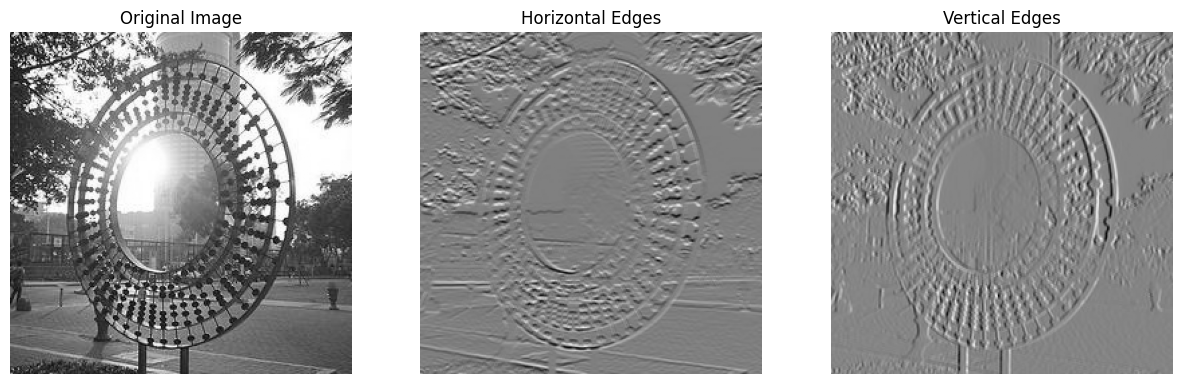

In [29]:
plt.figure(figsize=(15,5))

# Original Image
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(image_array[0,:,:,0], cmap='gray')
plt.axis('off')

# Horizontal Edges
plt.subplot(1,3,2)
plt.title("Horizontal Edges")
plt.imshow(horizontal_output[0,:,:,0], cmap='gray')
plt.axis('off')

# Vertical Edges
plt.subplot(1,3,3)
plt.title("Vertical Edges")
plt.imshow(vertical_output[0,:,:,0], cmap='gray')
plt.axis('off')

plt.show()


In [30]:
horizontal_conv = layers.Conv2D(
    filters=1,
    kernel_size=(3,3),
    padding='valid',
    use_bias=False,
    name="Horizontal_Conv",
    kernel_initializer=tf.keras.initializers.Constant(horizontal_kernel),
    activation='relu'
)(inputs)

horizontal_model = Model(inputs=inputs, outputs=horizontal_conv)

vertical_conv = layers.Conv2D(
    filters=1,
    kernel_size=(3,3),
    padding='valid',
    use_bias=False,
    name="Vertical_Conv",
    kernel_initializer=tf.keras.initializers.Constant(vertical_kernel),
    activation='relu'
)(inputs)

vertical_model = Model(inputs=inputs, outputs=vertical_conv)

horizontal_output = horizontal_model.predict(image_array)
vertical_output = vertical_model.predict(image_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


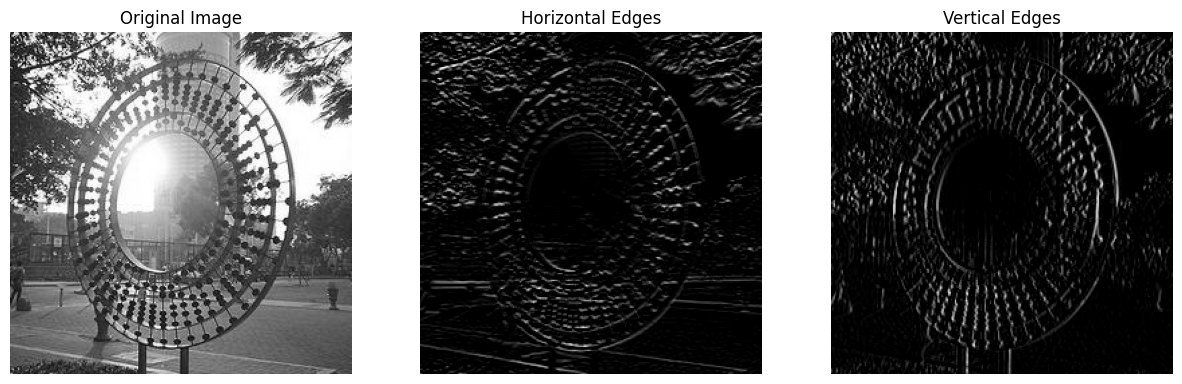

In [31]:
plt.figure(figsize=(15,5))

# Original Image
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(image_array[0,:,:,0], cmap='gray')
plt.axis('off')

# Horizontal Edges
plt.subplot(1,3,2)
plt.title("Horizontal Edges")
plt.imshow(horizontal_output[0,:,:,0], cmap='gray')
plt.axis('off')

# Vertical Edges
plt.subplot(1,3,3)
plt.title("Vertical Edges")
plt.imshow(vertical_output[0,:,:,0], cmap='gray')
plt.axis('off')

plt.show()
